In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import pandas as pd 
import numpy as np
from fastai import *
from fastai.vision import *
from matplotlib import pyplot as plt
from google.colab import drive


In [3]:
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
file_name = Path('/content/gdrive/My Drive/Car crash')
categories = os.listdir(file_name)
print(categories)

['side_damage', 'bonnet_damage', 'rear_damage', 'models']


In [0]:
np.random.seed(42)
data = (ImageList.from_folder(file_name)
       .split_by_rand_pct(0.2)
       .label_from_folder()
       .transform(get_transforms(do_flip = True, flip_vert=False, max_lighting=0.2, max_zoom=1.05, max_warp=0.2), size=256)
       .databunch(bs=16)
       .normalize(imagenet_stats))

In [8]:
print(data.c)
print(data.classes)

3
['bonnet_damage', 'rear_damage', 'side_damage']


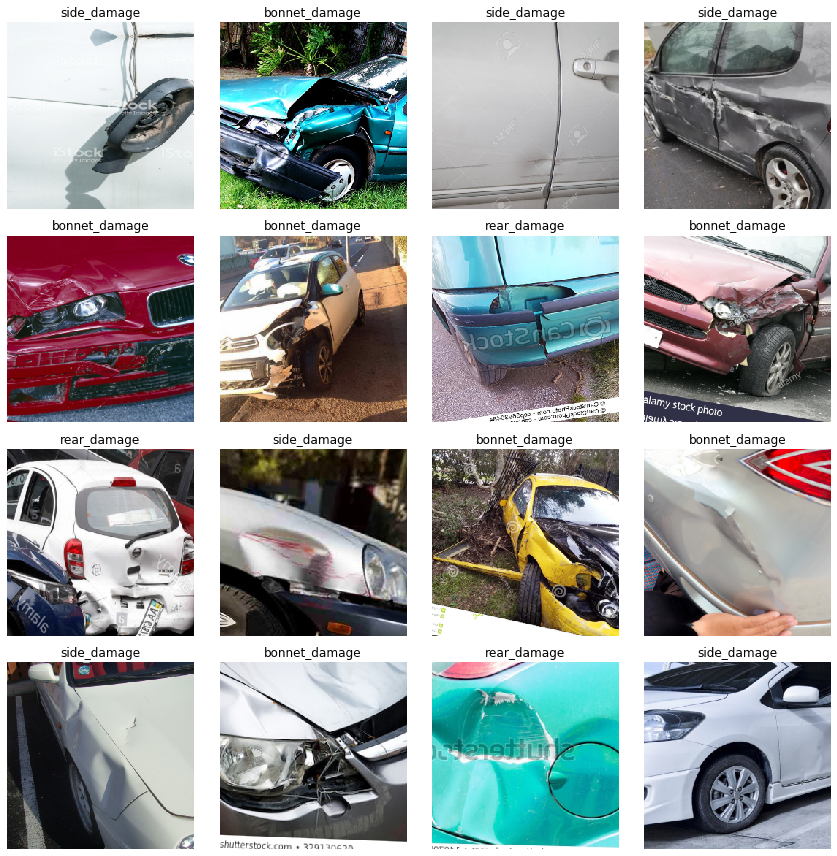

In [7]:
data.show_batch(rows=4, figsize=(12,12))

In [6]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 61.9MB/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-06
Min loss divided by 10: 1.10E-03


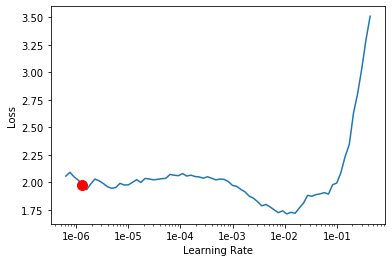

In [7]:
# learning rate optimization
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [8]:
learn.fit_one_cycle(20, slice(2e-03))

epoch,train_loss,valid_loss,accuracy,time
0,1.832562,0.940265,0.608247,00:39
1,1.662436,0.672739,0.762887,00:24
2,1.400138,0.716010,0.762887,00:23
3,1.226337,0.786833,0.752577,00:24
4,1.052306,0.699097,0.762887,00:24
5,0.941907,0.834724,0.721649,00:24
6,0.823674,0.949699,0.731959,00:26
7,0.727100,0.943698,0.731959,00:24
8,0.710111,0.901360,0.742268,00:24
9,0.640954,0.729528,0.824742,00:25


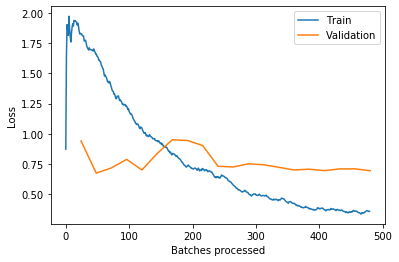

In [9]:
learn.recorder.plot_losses()

In [0]:
learn.save('stage_1')

In [0]:
learn = learn.load('stage_1')

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 7.59E-08


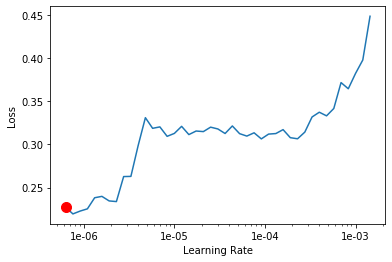

In [13]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [15]:
learn.fit_one_cycle(5, slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.349172,0.688612,0.814433,00:25
1,0.321987,0.719704,0.814433,00:25
2,0.298301,0.653670,0.835052,00:24
3,0.290612,0.643378,0.865979,00:24
4,0.298043,0.628546,0.835052,00:24


In [0]:
learn.save('stage_2')

In [0]:
learn.export()

In [0]:
learn.load('stage_2');

In [19]:
train_interp = ClassificationInterpretation.from_learner(learn,ds_type=DatasetType.Train)
valid_interp = ClassificationInterpretation.from_learner(learn)

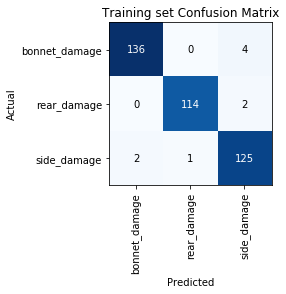

In [20]:
# Plot Training Set Confusion Matrix
train_interp.plot_confusion_matrix(title="Training set Confusion Matrix")

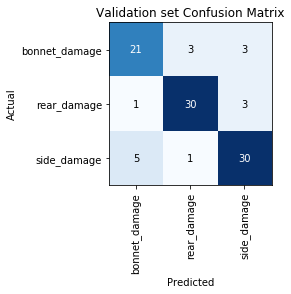

In [21]:
# Plot Validation Set Confusion Matrix
valid_interp.plot_confusion_matrix(title="Validation set Confusion Matrix")


In [0]:
losses,idxs = valid_interp.top_losses()

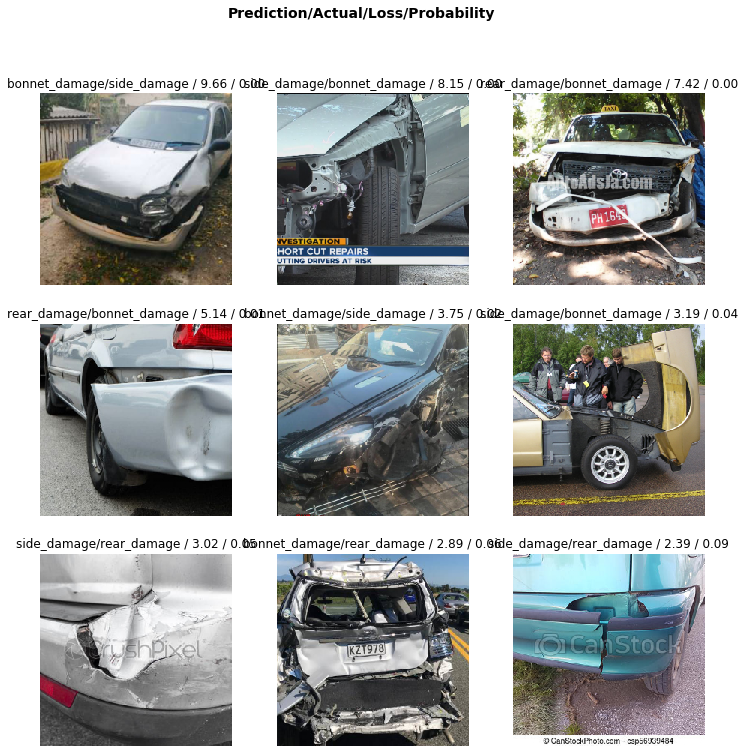

In [23]:
valid_interp.plot_top_losses(9)